In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
file_path = ('creditcard.csv')
data = pd.read_csv(file_path)
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106988 entries, 0 to 106987
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      106988 non-null  int64  
 1   V1      106988 non-null  float64
 2   V2      106988 non-null  float64
 3   V3      106988 non-null  float64
 4   V4      106988 non-null  float64
 5   V5      106988 non-null  float64
 6   V6      106988 non-null  float64
 7   V7      106988 non-null  float64
 8   V8      106988 non-null  float64
 9   V9      106988 non-null  float64
 10  V10     106988 non-null  float64
 11  V11     106988 non-null  float64
 12  V12     106988 non-null  float64
 13  V13     106988 non-null  float64
 14  V14     106988 non-null  float64
 15  V15     106988 non-null  float64
 16  V16     106988 non-null  float64
 17  V17     106988 non-null  float64
 18  V18     106988 non-null  float64
 19  V19     106988 non-null  float64
 20  V20     106988 non-null  float64
 21  V21     10

In [ ]:
data.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000,...,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,53493.500000,0.314153,-0.499045,1.009667,-0.652930,0.221973,0.491980,0.444737,-0.130365,0.552155,...,-0.121315,-0.118306,-0.048198,0.146453,0.150508,-0.014312,-0.212383,-0.097752,12024.208437,0.002187
std,30884.919637,0.630799,0.704597,0.668656,0.643213,0.624636,0.709308,0.533850,0.250891,0.749040,...,0.292010,0.577450,0.627793,1.109987,0.716631,1.078998,0.476899,0.773428,6927.188469,0.046716
min,0.000000,-3.495584,-49.966572,-2.631176,-4.468314,-5.182978,-21.111108,-3.470512,-10.756342,-2.740952,...,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-7.958110,-5.891670,-24.176384,50.120000,0.000000
25%,26746.750000,-0.168811,-0.658493,0.563486,-1.001905,-0.052377,0.091482,0.246258,-0.182679,0.116050,...,-0.194258,-0.515671,-0.200651,-0.548520,-0.294381,-0.772908,-0.306713,-0.112432,6022.880000,0.000000
50%,53493.500000,0.088978,-0.418268,0.912298,-0.541820,0.136636,0.386461,0.408702,-0.134856,0.423434,...,-0.126036,-0.118807,-0.073642,0.164150,0.197420,-0.146056,-0.225591,-0.043623,11989.090000,0.000000
75%,80240.250000,0.954854,-0.207611,1.386344,-0.207959,0.353247,0.749557,0.584422,-0.067106,0.850596,...,-0.055172,0.252404,0.058374,0.863532,0.615930,0.653775,-0.139599,0.085295,18019.290000,0.000000
max,106987.000000,1.695400,3.781692,4.615014,3.175853,42.716891,9.704313,41.568286,5.958040,12.171681,...,8.087080,12.632511,26.190808,11.035900,10.458350,5.623285,30.339264,77.255937,24039.930000,1.000000


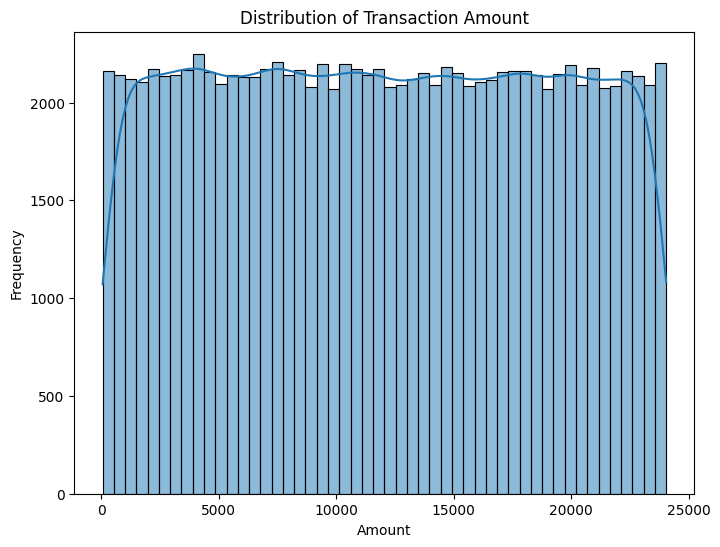

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

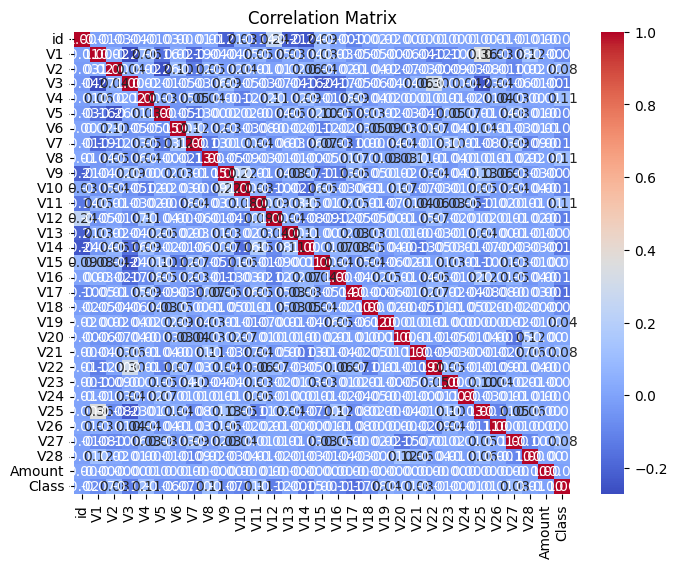

In [ ]:
correlation = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106988 entries, 0 to 106987
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      106988 non-null  int64  
 1   V1      106988 non-null  float64
 2   V2      106988 non-null  float64
 3   V3      106988 non-null  float64
 4   V4      106988 non-null  float64
 5   V5      106988 non-null  float64
 6   V6      106988 non-null  float64
 7   V7      106988 non-null  float64
 8   V8      106988 non-null  float64
 9   V9      106988 non-null  float64
 10  V10     106988 non-null  float64
 11  V11     106988 non-null  float64
 12  V12     106988 non-null  float64
 13  V13     106988 non-null  float64
 14  V14     106988 non-null  float64
 15  V15     106988 non-null  float64
 16  V16     106988 non-null  float64
 17  V17     106988 non-null  float64
 18  V18     106988 non-null  float64
 19  V19     106988 non-null  float64
 20  V20     106988 non-null  float64
 21  V21     10

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, f1_score, auc, recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import kagglehub
df = pd.read_csv('creditcard.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,2.076882e-12,-3.248204e-12,-3.636929e-12,3.879536e-12,2.409066e-13,2.768028e-12,-9.496329e-14,2.831363e-12,-2.488498e-12,...,-3.358969e-13,-2.163216e-13,2.562302e-12,-4.924404e-14,-2.931602e-12,4.378988e-13,-1.661857e-12,-2.416333e-12,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528580e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590122e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
print(df.dtypes)

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [ ]:
df.set_index(df.columns[0], inplace=True)

# Visualizza il DataFrame aggiornato
print(df)

              V1        V2        V3        V4        V5        V6        V7  \
id                                                                             
0      -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1       0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2      -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3      -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4      -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   
...          ...       ...       ...       ...       ...       ...       ...   
568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454 -0.370393   
568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148 -0.016935   
568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098 -0.070958   
568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148  0.580568   
568629 -0.795144  0.433236 -0.649140  0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv('/kaggle/input/credit-card-fraud-detection/credit_card_fraud_dataset.csv')

# Introduction to the Dataset
print("First 5 rows of the dataset:\n", df.head())
print("\nMissing values in each column:\n", df.isnull().sum())
print("\nDataset Statistics:\n", df.describe())

First 5 rows of the dataset:
           V1        V2        V3        V4        V5        V6        V7  \
id                                                                         
0  -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2  -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3  -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4  -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

          V8        V9       V10  ...       V21       V22       V23       V24  \
id                                ...                                           
0  -0.130006  0.727159  0.637735  ... -0.110552  0.217606 -0.134794  0.165959   
1  -0.133118  0.347452  0.529808  ... -0.194936 -0.605761  0.079469 -0.577395   
2  -0.095576 -0.261297  0.690708  ... -0.005020  0.702906  0.945045 -1.154666   
3  -0.065130 -0.205698  0.575231